<a href="https://colab.research.google.com/github/ukhyun-lee/stock_market_analysis/blob/main/3%EC%A3%BC%EC%B0%A8/%EB%B1%85%ED%81%AC%EB%9F%B0%EC%9D%B4_%EC%98%AC_%EA%B2%83%EC%9D%B8%EA%B0%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

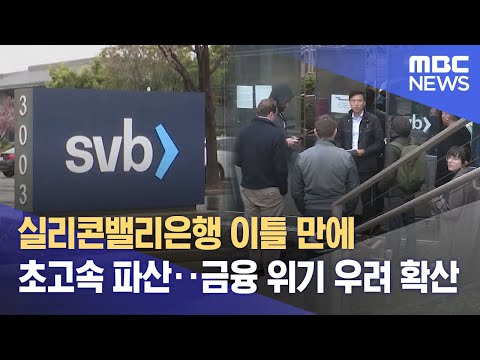

In [46]:
from IPython.display import YouTubeVideo, display
video = YouTubeVideo("A40a6IZcS9o", width=500)
display(video)

# 환경설정

In [47]:
!pip install pandas-datareader
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# SIVB 데이터 가져오기

In [48]:
from pandas_datareader import data
import yfinance as yfin

yfin.pdr_override()

df = data.get_data_yahoo('SIVB', start = '2021-01-01' )
df.tail()


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-04-03,0.8770,1.170,0.877,0.98505,0.98505,16018917
2023-04-04,0.9900,1.080,0.912,0.97000,0.97000,6836192
2023-04-05,0.9680,1.040,0.881,0.91010,0.91010,4847379
2023-04-06,0.9290,0.929,0.750,0.79900,0.79900,6573026
2023-04-10,0.8076,0.849,0.500,0.60500,0.60500,13347180


## 데이터프레임 plot()

<Axes: xlabel='Date'>

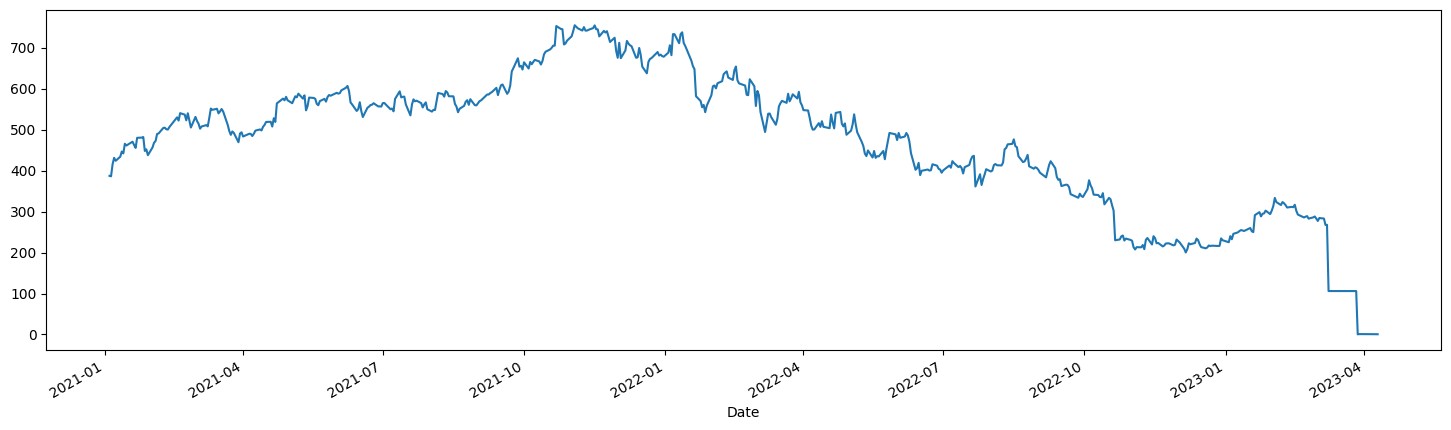

In [49]:
df['Close'].plot(figsize=(18,5))

## plotly


### line()

- 'Close' 시각화



In [50]:
import plotly.express as px

fig = px.line(df, y='Close')
fig.show()

### bar()
- 'Volume' 시각화

In [51]:
fig = px.bar(df, y='Volume')
fig.show()

### line() with Rageslider


In [52]:
fig = px.line(df, y='Close', title='Time Series with Rangeslider')

fig.update_xaxes(rangeslider_visible=True)
fig.show()

### line() with button()

In [53]:
fig = px.line(df, y='Close', title='Time Series with Rangeslider')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

### subplot()

In [54]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Line(x = df.index, y = df['Close']),
    secondary_y=False
)

# Add traces
fig.add_trace(
    go.Bar(x = df.index, y = df['Volume']),
    secondary_y=True
)

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)

# Set y-axes titles
fig.update_yaxes(title_text="<b>Close</b> axis", secondary_y=False)
fig.update_yaxes(title_text="<b>Volume</b> axis", secondary_y=True)

fig.show()

/usr/local/lib/python3.9/dist-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




### candlestick()

In [55]:
import pandas as pd
from datetime import datetime

fig = go.Figure(data = go.Candlestick(
        x = df.index,
        open = df['Open'],
        close = df['Close'],
        low = df['Low'],
        high = df['High'],
))

fig.show()

# 주요 금융주 추이 확인하기

## 데이터 가져오기

In [56]:
bank_tickers = ['SIVB',
                'JPM', # JP Morgan 
                'BAC', # Bank of America
                'CCBG', # Capital City Bank Group
                'AXP' # American Express Company
                 ]
df = pd.DataFrame()
for ticker in bank_tickers:
    temp = data.get_data_yahoo(ticker, start = '2020-01-01')['Close']
    df = pd.merge(df, temp, right_index=True, left_index=True, how='outer', suffixes=('', ticker))

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [57]:
df

,Close,CloseJPM,CloseBAC,CloseCCBG,CloseAXP
Date,,,,,
2020-01-02,254.270004,141.089996,35.639999,30.180000,125.849998
2020-01-03,250.330002,138.339996,34.900002,29.840000,124.599998
2020-01-06,249.240005,138.229996,34.849998,29.700001,124.059998
2020-01-07,250.399994,135.880005,34.619999,29.469999,123.410004
2020-01-08,252.779999,136.940002,34.970001,29.620001,125.540001
...,...,...,...,...,...
2023-04-03,0.985050,130.160004,28.590000,29.680000,163.779999
2023-04-04,0.970000,128.419998,27.980000,29.160000,162.559998
2023-04-05,0.910100,127.610001,27.639999,29.320000,161.080002


`Close`를 제외하고 티커로 컬럼명 바꾸기 

In [58]:
df.set_axis(labels=bank_tickers, axis=1, inplace = True)
df.head()

,SIVB,JPM,BAC,CCBG,AXP
Date,,,,,
2020-01-02,254.270004,141.089996,35.639999,30.180000,125.849998
2020-01-03,250.330002,138.339996,34.900002,29.840000,124.599998
2020-01-06,249.240005,138.229996,34.849998,29.700001,124.059998
2020-01-07,250.399994,135.880005,34.619999,29.469999,123.410004
2020-01-08,252.779999,136.940002,34.970001,29.620001,125.540001


## 5개 금융주 시각화하기

In [59]:
import plotly.express as px
fig = px.line(df, x=df.index, y=df.columns)
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y")
fig.show()

## 스케일 맞춰주기

In [60]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df.values)
scaled_df = pd.DataFrame(data=scaled_data, columns=df.columns, index = df.index)

In [61]:
fig = px.line(scaled_df, x=scaled_df.index, y=scaled_df.columns)
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y")
fig.show()